In [15]:
import re
import numpy as np
import glob
import os

In [ ]:
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.style.use('default') 
plt.rcParams.update({
    'figure.facecolor': 'None',
    'axes.facecolor': 'None',
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.5,

    # remove borders
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,

    # ticks
    'xtick.color': 'lightgray',
    'ytick.color': 'lightgray',
    'xtick.direction': 'out',
    'ytick.direction': 'out',

    # grid
    'axes.grid': True,          # enable grid globally
    'grid.color': '#777777',  # very light gray
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3,

    # lines
    'lines.linewidth': 1.0,

    # font
    'font.size': 10,
    'font.family': 'sans-serif',
    'text.color': 'gray',   # axis labels, titles, etc.
    'axes.labelcolor': 'gray',
})


In [81]:
def parse_timings_from_file(filename):
    """Extract timing values from one file."""
    timings = []
    with open(filename, "r") as f:
        for line in f:
            # match lines like "time total: 135.405116"
            match = re.search(r"time .*?:\s+([\d\.Ee+-]+)", line)
            if match:
                timings.append(float(match.group(1)))
    return timings


def collect_data(init_file = "output", folder = ""):
    # find files named like output${threads}P${P}
    files = glob.glob(folder + init_file + "*P*")

    threads_list = []
    all_timings = []

    for fname in files:
        # extract thread number from filename (between "output" and "P")
        match = re.search(r"outputT(\d+)P", fname)
        if not match:
            continue
        threads = int(match.group(1))

        timings = parse_timings_from_file(fname)

        threads_list.append(threads)
        all_timings.append(timings)

    array_T = np.array(threads_list)
    array_time = np.array(all_timings)

    return array_T, array_time

In [103]:
def collect_data(init_file="output", folder=""):
    files = glob.glob(folder + init_file + "*T*")

    threads_list = []
    n_list = []
    p_list = []
    all_timings = []

    for fname in files:
        # extract N, P, T values from filename
        match = re.search(r"N(\d+)P(\d+)T(\d+)\.log$", fname)
        print(match)
        if not match:
            continue
        
        n_val = int(match.group(1))
        p_val = int(match.group(2))
        threads = int(match.group(3))

        timings = parse_timings_from_file(fname)

        n_list.append(n_val)
        p_list.append(p_val)
        threads_list.append(threads)
        all_timings.append(timings)

    array_N = np.array(n_list)
    array_P = np.array(p_list)
    array_T = np.array(threads_list)
    array_time = np.array(all_timings)

    return array_N, array_P, array_T, array_time

In [104]:
_, _, array_T, array_time = collect_data("orfeo_", "Orfeo/OpenMP/")
array_T

<re.Match object; span=(19, 29), match='N1P1T4.log'>
<re.Match object; span=(19, 29), match='N1P1T2.log'>
<re.Match object; span=(19, 31), match='N1P1T128.log'>
<re.Match object; span=(19, 29), match='N1P1T8.log'>
<re.Match object; span=(19, 30), match='N1P1T16.log'>
<re.Match object; span=(19, 30), match='N1P1T64.log'>
<re.Match object; span=(19, 30), match='N1P1T32.log'>
<re.Match object; span=(19, 29), match='N1P1T1.log'>


array([  4,   2, 128,   8,  16,  64,  32,   1])

<br>
<br>

## Plots

In [105]:
def plotTime(x, times, serial = None, x_label = "Threads"):
    idx = np.argsort(x)
    x = x[idx]
    times = times[idx]

    serial = times[0, 0] if serial is None else serial
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(x,  times[:, 0], color = "#E2B1FF")

    x_ideal = np.linspace(x[0], x[-1], 200)
    ax.plot(x_ideal, serial/x_ideal, linestyle = "--", color = "#FFA0D4")

    ax.set_xscale("log")
    ax.set_xticks(x )
    ax.get_xaxis().set_major_formatter(ScalarFormatter())


    ax.set_xlabel(x_label)
    ax.set_ylabel("Time (s)")
    plt.show()
    

In [106]:
def speedUp(x, times, serial = None, x_label = "Threads"):
    idx = np.argsort(x)
    x = x[idx]
    times = times[idx]

    serial = times[0, 0] if serial is None else serial
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(x,  serial/times[:, 0], color = "#E2B1FF")

    x_ideal = np.linspace(x[0], x[-1], 200)
    ax.plot(x_ideal, x_ideal, linestyle = "--", color = "#FFA0D4")

    ax.set_xticks(x )


    ax.set_xlabel(x_label)
    ax.set_ylabel("Speed up")
    plt.show()

In [107]:
def efficiency(x, times, serial = None, x_label = "Threads"):
    idx = np.argsort(x)
    x = x[idx]
    times = times[idx]

    serial = times[0, 0] if serial is None else serial
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(x,  serial/times[:, 0]/x, color = "#E2B1FF")

    ax.hlines(1, x[0], x[-1], linestyle = "--", color = "#FFA0D4")

    ax.set_xscale("log")
    ax.set_xticks(x )
    ax.get_xaxis().set_major_formatter(ScalarFormatter())

    ax.set_xlabel(x_label)
    ax.set_ylabel("Efficiency")
    plt.show()

In [108]:
def percentagesPlot(x, times, serial = None, x_label = "Threads"):
    idx = np.argsort(x)
    timeTot = timesPercentage = times[idx][:, 1:-1].sum(axis=-1)
    timesPercentage = times[idx][:, 1:-1]/timeTot[:,None]
    x  = x[idx]

    rowLabels = np.array(["Fill Buffers", 
                          "Update center",
                          "wait EAST WEST",
                          "compute EAST WEST",
                          "wait NORTH SOUTH",
                          "compute NORTH SOUTH"])

    colors = np.array([ "#F2FF00", 
                        "#86FF76",
                        "#8F9FFF",
                        "#0026FF",
                        "#FF8989",
                        "#FF0000"])

    fig, ax = plt.subplots(figsize = (10, 5))
    n_rows, n_cols = timesPercentage.shape
    cumulative = np.zeros(n_rows)

    for j in range(n_cols):
        ax.bar(range(n_rows), timesPercentage[:, j], bottom=cumulative, color=colors[j], label=rowLabels[j])
        cumulative += timesPercentage[:, j]

    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', 
              borderaxespad=0., frameon=True)
    
    ax.set_title('Time Percentages')
    ax.set_xticks(range(n_rows))
    ax.set_xticklabels([cpu for cpu in x])

    ax.set_ylabel("Time %")
    ax.set_xlabel(x_label)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

## Orfeo OpenMP

In [109]:
_, _, array_T, array_time = collect_data("orfeo_", "Orfeo/OpenMP/")
array_T

<re.Match object; span=(19, 29), match='N1P1T4.log'>
<re.Match object; span=(19, 29), match='N1P1T2.log'>
<re.Match object; span=(19, 31), match='N1P1T128.log'>
<re.Match object; span=(19, 29), match='N1P1T8.log'>
<re.Match object; span=(19, 30), match='N1P1T16.log'>
<re.Match object; span=(19, 30), match='N1P1T64.log'>
<re.Match object; span=(19, 30), match='N1P1T32.log'>
<re.Match object; span=(19, 29), match='N1P1T1.log'>


array([  4,   2, 128,   8,  16,  64,  32,   1])

In [110]:
idx = np.argsort(array_T)
array_T[idx]

array([  1,   2,   4,   8,  16,  32,  64, 128])

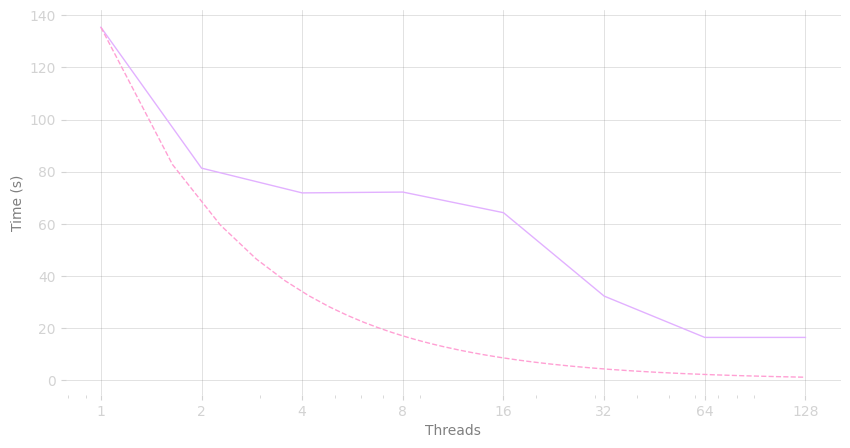

In [111]:
plotTime(array_T, array_time)

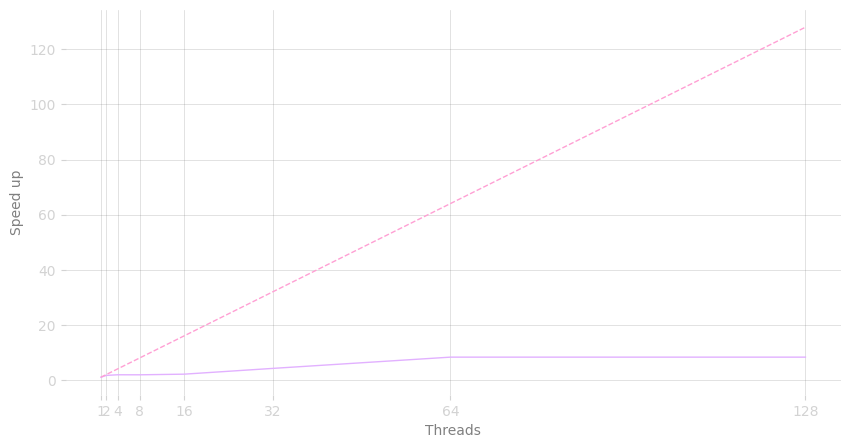

In [112]:
speedUp(array_T, array_time)

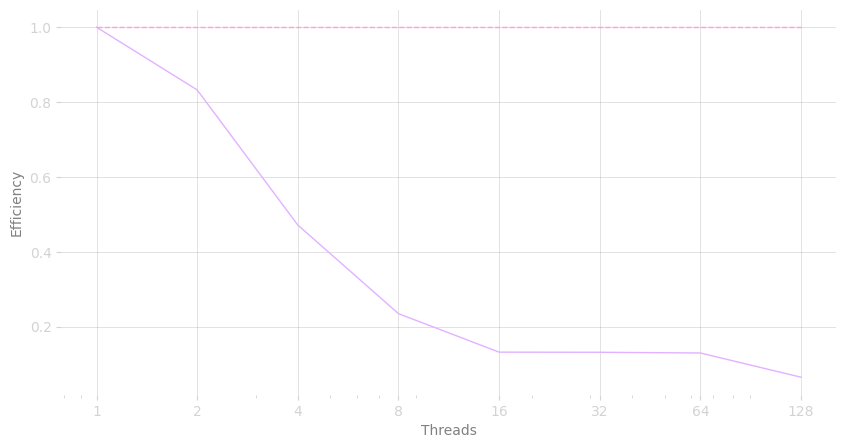

In [113]:
efficiency(array_T, array_time)

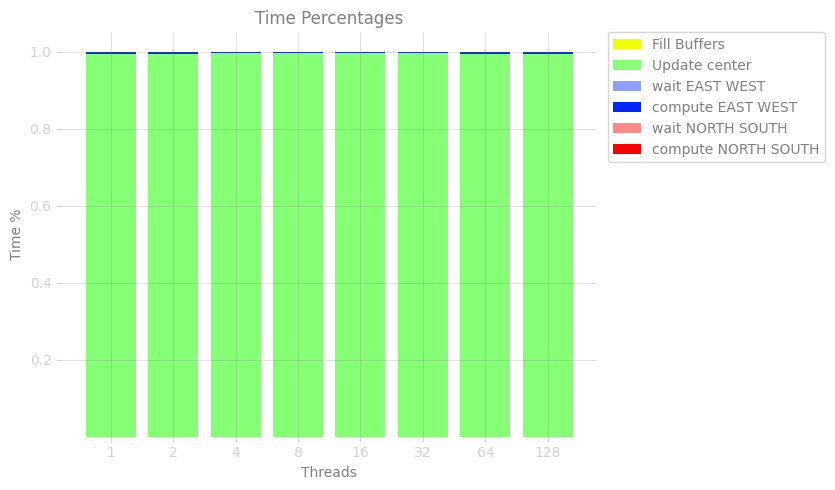

In [114]:
percentagesPlot(array_T, array_time)

## Leonardo OpenMP

In [117]:
_, _, leo_T, leo_time = collect_data("leonardo_", "Leonardo/OpenMP/")
leo_T

<re.Match object; span=(25, 35), match='N1P1T8.log'>
<re.Match object; span=(25, 35), match='N1P1T2.log'>
<re.Match object; span=(25, 36), match='N1P1T64.log'>
<re.Match object; span=(25, 36), match='N1P1T32.log'>
<re.Match object; span=(25, 36), match='N1P1T16.log'>
<re.Match object; span=(25, 35), match='N1P1T1.log'>
<re.Match object; span=(25, 35), match='N1P1T4.log'>
<re.Match object; span=(25, 37), match='N1P1T112.log'>


array([  8,   2,  64,  32,  16,   1,   4, 112])

In [118]:
leo_idx = np.argsort(leo_T)
leo_T[leo_idx]

array([  1,   2,   4,   8,  16,  32,  64, 112])

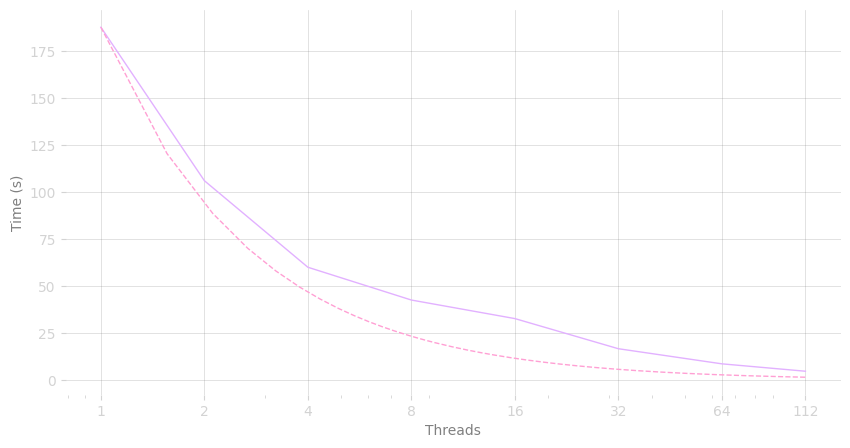

In [119]:
plotTime(leo_T, leo_time)

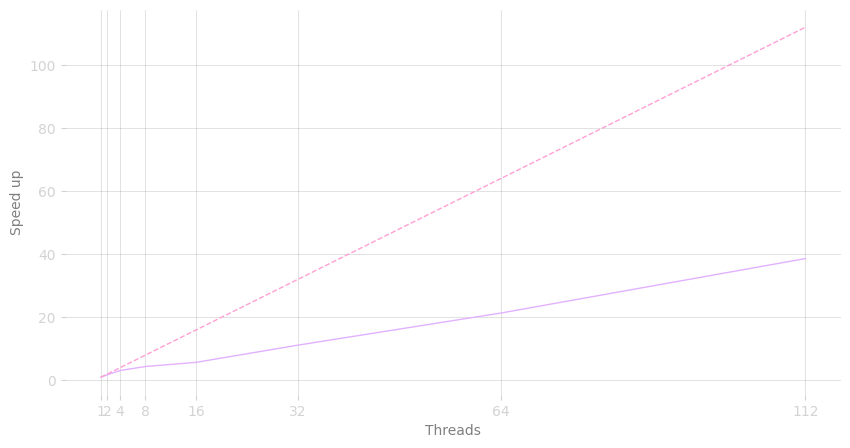

In [120]:
speedUp(leo_T, leo_time)

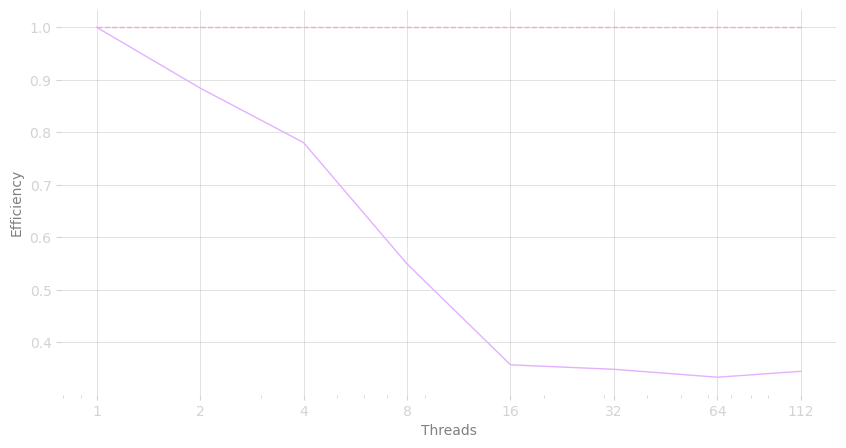

In [121]:
efficiency(leo_T, leo_time)

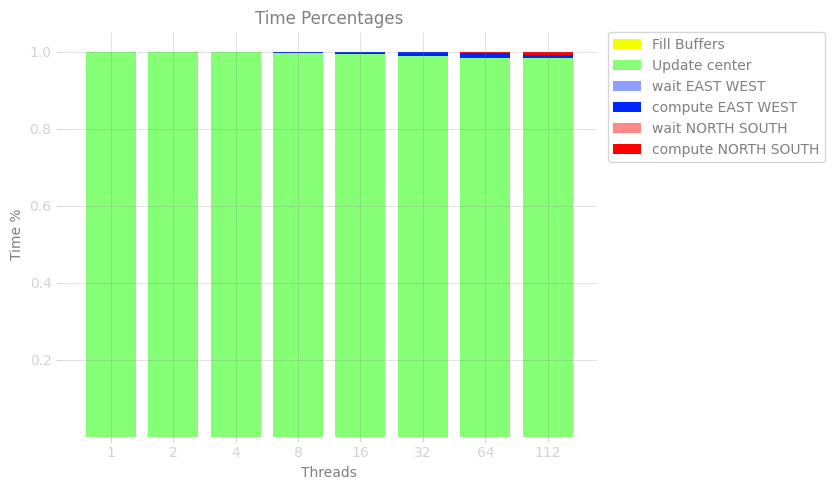

In [122]:
percentagesPlot(leo_T, leo_time)